In [1]:
import joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
my_package = "C:\\Users\\welcome\\Desktop\\MyFuncs"
imp_mods = joblib.os.sys.path

if my_package not in imp_mods:
    imp_mods.append(my_package)
    print("Package imported successfully!")

Package imported successfully!


In [3]:
import myio_funcs as mf

In [4]:
# pth = "C:\\Users\\welcome\\Documents\\Data science"
pth = "W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets"
sf = mf.file_search(pth, "KPMG_VI", "csv")
sf.keys()

dict_keys(['KPMG_VI_Customer_Address.csv', 'KPMG_VI_Customer_Demographic.csv', 'KPMG_VI_New_Customer_List.csv', 'KPMG_VI_Transactions (Oct-Nov-Dec).csv', 'KPMG_VI_Transactions.csv', 'KPMG_VI_Transactions2.csv'])

In [5]:
# joblib.os.listdir("W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets\\")

#### TRANSACTIONS DATABASE

In [6]:
trans = pd.read_csv(sf['KPMG_VI_Transactions.csv'])
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25-02-17,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,21-05-17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,16-10-17,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,31-08-17,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,01-10-17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0


In [7]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


In [8]:
trans['transaction_date'] = pd.to_datetime(trans['transaction_date'], dayfirst=True)

In [9]:
trans['trans_week_day'] = trans['transaction_date'].dt.day_name()
trans['trans_day_num'] = trans['transaction_date'].dt.day
trans['trans_month_num'] = trans['transaction_date'].dt.month
trans['trans_month'] = trans['transaction_date'].dt.month_name()
trans['trans_year'] = trans['transaction_date'].dt.year

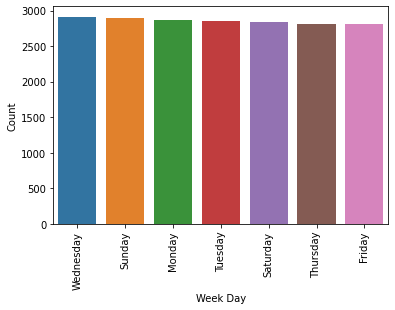

In [10]:
days_count = trans['trans_week_day'].value_counts()
sns.barplot(x=days_count.index, y=days_count)
plt.xticks(rotation=90), plt.ylabel('Count'), plt.xlabel("Week Day");

#### CUSTOMER DATABASE

In [11]:
custs = pd.read_csv(sf['KPMG_VI_Customer_Demographic.csv'])
custs.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,01-Feb,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [12]:
custs = custs.drop(labels='default', axis=1)
custs.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [13]:
# custs['DOB'].astype('datetime64')
custs['DOB'] = pd.to_datetime(custs['DOB'], yearfirst=True)
custs.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [14]:
custs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [15]:
sf.keys()

dict_keys(['KPMG_VI_Customer_Address.csv', 'KPMG_VI_Customer_Demographic.csv', 'KPMG_VI_New_Customer_List.csv', 'KPMG_VI_Transactions (Oct-Nov-Dec).csv', 'KPMG_VI_Transactions.csv', 'KPMG_VI_Transactions2.csv'])

In [16]:
trans2 = pd.read_csv(sf['KPMG_VI_Transactions2.csv'])
trans2.head()

,Unnamed: 0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,0,1,2,2950,25-02-17,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,1,2,3,3120,21-05-17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,2,3,37,402,16-10-17,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,3,4,88,3135,31-08-17,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,4,5,78,787,01-10-17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [17]:
trans2.drop(axis=1, labels='Unnamed: 0').isna().sum()[trans2.drop(axis=1, labels='Unnamed: 0').isna().sum() > 0]

online_order               360
brand                      197
product_line               197
product_class              197
product_size               197
standard_cost              197
product_first_sold_date    197
dtype: int64

In [18]:
import ds_funcs as dsf

In [19]:
missing = dsf.percentage_missing_data(trans2)
mp = dsf.percentage_missing_data(trans2, in_percentage=True)

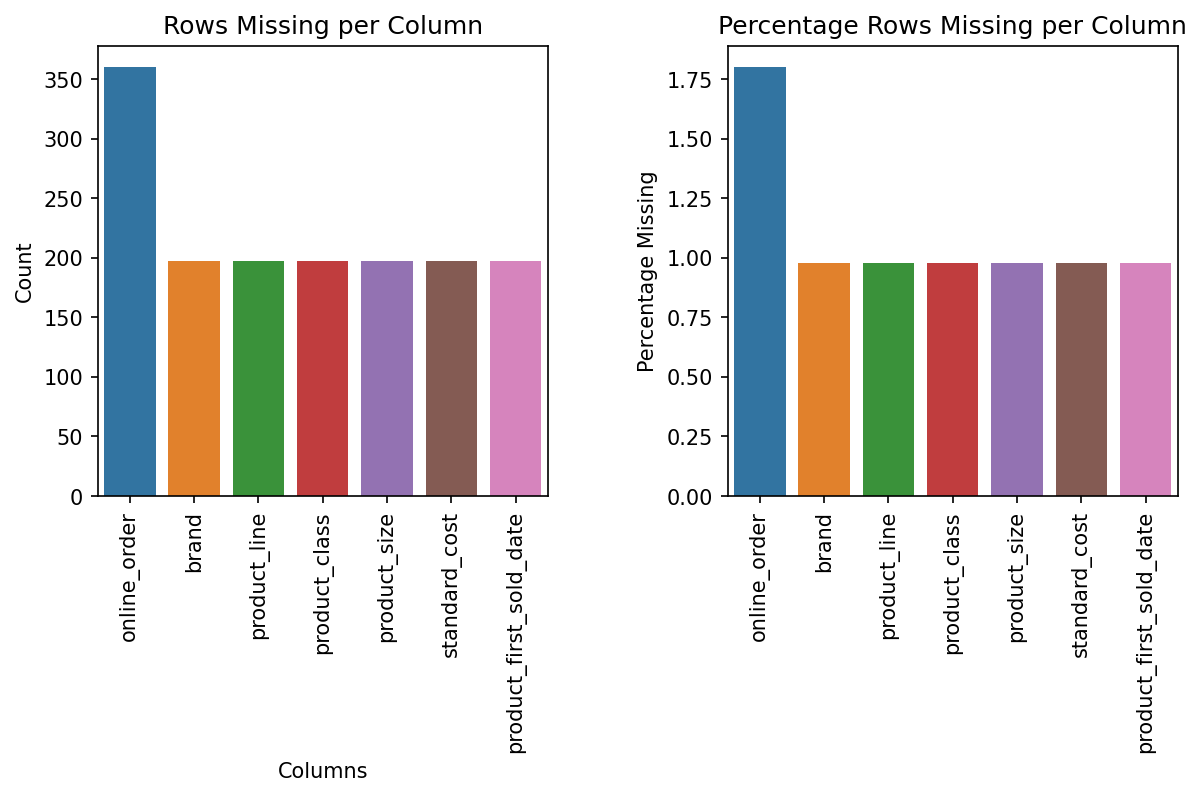

In [20]:
fig = plt.figure(figsize=(6, 3), dpi=150)
l, r = fig.add_axes(rect=[0, 0, .5, 1]), fig.add_axes(rect=[.7, 0, .5, 1])

sns.barplot(x=missing.index, y=missing, ax=l)
sns.barplot(x=mp.index, y=mp, ax=r)

l.set_xticklabels(labels=missing.index, rotation=90)
r.set_xticklabels(labels=mp.index, rotation=90)

l.set_xlabel("Columns"), l.set_ylabel("Count")
r.set_ylabel("Percentage Missing")
l.set_title("Rows Missing per Column"), r.set_title("Percentage Rows Missing per Column");

In [21]:
trans.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'trans_week_day', 'trans_day_num',
       'trans_month_num', 'trans_month', 'trans_year'],
      dtype='object')

In [22]:
custs.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

<AxesSubplot:ylabel='order_status'>

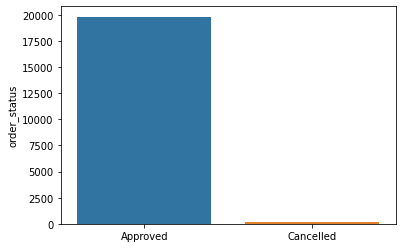

In [23]:
ords = trans['order_status'].value_counts()
sns.barplot(x=ords.index, y=ords)
# plt.ylim(top=3000)

In [24]:
approved_trans = trans.loc[trans['order_status'] == 'Approved']

In [25]:
# Now drop the order_status column
# because dataframe now contains only approved orders
approved_trans = approved_trans.drop(labels='order_status', axis=1)
approved_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year
0,1,2,2950,2017-02-25,False,Solex,Standard,medium,medium,71.49,$53.62,41245.0,Saturday,25,2,February,2017
1,2,3,3120,2017-05-21,True,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,Sunday,21,5,May,2017
2,3,37,402,2017-10-16,False,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0,Monday,16,10,October,2017
3,4,88,3135,2017-08-31,False,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0,Thursday,31,8,August,2017
4,5,78,787,2017-10-01,True,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0,Sunday,1,10,October,2017


In [26]:
approved_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19821 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19821 non-null  int64         
 1   product_id               19821 non-null  int64         
 2   customer_id              19821 non-null  int64         
 3   transaction_date         19821 non-null  datetime64[ns]
 4   online_order             19467 non-null  object        
 5   brand                    19625 non-null  object        
 6   product_line             19625 non-null  object        
 7   product_class            19625 non-null  object        
 8   product_size             19625 non-null  object        
 9   list_price               19821 non-null  float64       
 10  standard_cost            19625 non-null  object        
 11  product_first_sold_date  19625 non-null  float64       
 12  trans_week_day           19821 n

In [27]:
dsf.percentage_missing_data(approved_trans)

online_order               354
brand                      196
product_line               196
product_class              196
product_size               196
standard_cost              196
product_first_sold_date    196
dtype: int64

In [28]:
# join details of only living customer to approved transactions
cust_trans = pd.merge(approved_trans, custs.loc[custs['deceased_indicator'] == 'N'], how='inner', on=['customer_id'])

# remove the deceased_indicator feature since 
# we are dealing with only living customers
cust_trans = cust_trans.drop('deceased_indicator', axis=1)
cust_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,2,2950,2017-02-25,False,Solex,Standard,medium,medium,71.49,...,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0
1,11065,1,2950,2017-10-16,False,Giant Bicycles,Standard,medium,medium,1403.50,...,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0
2,18923,62,2950,2017-04-26,False,Solex,Standard,medium,medium,478.16,...,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0
3,2,3,3120,2017-05-21,True,Trek Bicycles,Standard,medium,large,2091.47,...,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10.0
4,6862,4,3120,2017-10-05,False,Giant Bicycles,Standard,high,medium,1129.13,...,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10.0


In [29]:
cust_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19810 entries, 0 to 19809
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19810 non-null  int64         
 1   product_id                           19810 non-null  int64         
 2   customer_id                          19810 non-null  int64         
 3   transaction_date                     19810 non-null  datetime64[ns]
 4   online_order                         19456 non-null  object        
 5   brand                                19614 non-null  object        
 6   product_line                         19614 non-null  object        
 7   product_class                        19614 non-null  object        
 8   product_size                         19614 non-null  object        
 9   list_price                           19810 non-null  float64       
 10  standard_c

In [30]:
missing_data = dsf.percentage_missing_data(cust_trans)
missing_data

job_industry_category      3206
job_title                  2379
last_name                   635
DOB                         444
tenure                      444
online_order                354
brand                       196
product_line                196
product_class               196
product_size                196
standard_cost               196
product_first_sold_date     196
dtype: int64

In [31]:
# columns with missing values
missing_cols = missing_data.index
# customer ids of customers with missing first names
cust_ids = cust_trans.loc[cust_trans['first_name'].isnull(), 'customer_id']
# customer details with missing firstname
custs.loc[custs['customer_id'].isin(list(cust_ids))]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure


In [32]:
sf.keys()

dict_keys(['KPMG_VI_Customer_Address.csv', 'KPMG_VI_Customer_Demographic.csv', 'KPMG_VI_New_Customer_List.csv', 'KPMG_VI_Transactions (Oct-Nov-Dec).csv', 'KPMG_VI_Transactions.csv', 'KPMG_VI_Transactions2.csv'])

In [33]:
cust_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19810 entries, 0 to 19809
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19810 non-null  int64         
 1   product_id                           19810 non-null  int64         
 2   customer_id                          19810 non-null  int64         
 3   transaction_date                     19810 non-null  datetime64[ns]
 4   online_order                         19456 non-null  object        
 5   brand                                19614 non-null  object        
 6   product_line                         19614 non-null  object        
 7   product_class                        19614 non-null  object        
 8   product_size                         19614 non-null  object        
 9   list_price                           19810 non-null  float64       
 10  standard_c

In [34]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0,Saturday,25,2,February,2017
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,Sunday,21,5,May,2017
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0,Monday,16,10,October,2017
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0,Thursday,31,8,August,2017
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0,Sunday,1,10,October,2017


In [35]:
cust_addr = pd.read_csv(sf['KPMG_VI_Customer_Address.csv'])
cust_addr.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [36]:
cust_addr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


#### JOIN CUSTOMER ADDRESS DETAILS TO EXISTING CUSTOMER_TRANSACTIONS DATAFRAME

In [37]:
cust_trans = pd.merge(cust_addr, cust_trans, how='inner', on='customer_id')
cust_trans.head()

,customer_id,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,...,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,94,86,2017-12-23,False,...,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
1,1,060 Morning Avenue,2016,New South Wales,Australia,10,3765,38,2017-04-06,True,...,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
2,1,060 Morning Avenue,2016,New South Wales,Australia,10,5157,47,2017-05-11,True,...,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
3,1,060 Morning Avenue,2016,New South Wales,Australia,10,9785,72,2017-01-05,False,...,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
4,1,060 Morning Avenue,2016,New South Wales,Australia,10,13424,2,2017-02-21,False,...,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0


In [38]:
# remove the country column since buyers are all in Australia
cust_trans = cust_trans.drop('country', axis=1)
cust_trans.head()

,customer_id,address,postcode,state,property_valuation,transaction_id,product_id,transaction_date,online_order,brand,...,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,060 Morning Avenue,2016,New South Wales,10,94,86,2017-12-23,False,OHM Cycles,...,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
1,1,060 Morning Avenue,2016,New South Wales,10,3765,38,2017-04-06,True,Solex,...,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
2,1,060 Morning Avenue,2016,New South Wales,10,5157,47,2017-05-11,True,Trek Bicycles,...,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
3,1,060 Morning Avenue,2016,New South Wales,10,9785,72,2017-01-05,False,Norco Bicycles,...,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
4,1,060 Morning Avenue,2016,New South Wales,10,13424,2,2017-02-21,False,Solex,...,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0


## HANDLING MISSING DATA

In [39]:
dsf.percentage_missing_data(cust_trans)

job_industry_category      3199
job_title                  2365
last_name                   635
DOB                         444
tenure                      444
online_order                353
brand                       194
product_line                194
product_class               194
product_size                194
standard_cost               194
product_first_sold_date     194
dtype: int64

In [40]:
na_stdcost = cust_trans.loc[cust_trans['standard_cost'].isnull(), ['transaction_date', 'online_order', 'product_id', 'brand', 'product_line', 'product_class', 'product_size', 'product_first_sold_date', 'list_price', 'standard_cost']]
na_stdcost['product_id'].value_counts()

0    194
Name: product_id, dtype: int64

In [41]:
trans[(trans['product_id'] == 0) & (trans['brand'].isnull())]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year
136,137,0,431,2017-09-23,False,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN,Saturday,23,9,September,2017
159,160,0,3300,2017-08-27,False,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN,Sunday,27,8,August,2017
366,367,0,1614,2017-03-10,False,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN,Friday,10,3,March,2017
406,407,0,2559,2017-06-14,True,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN,Wednesday,14,6,June,2017
676,677,0,2609,2017-07-02,False,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN,Sunday,2,7,July,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,True,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN,Tuesday,26,12,December,2017
19383,19384,0,2407,2017-06-11,False,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN,Sunday,11,6,June,2017
19793,19794,0,2860,2017-01-13,False,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN,Friday,13,1,January,2017
19859,19860,0,2468,2017-06-24,True,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN,Saturday,24,6,June,2017


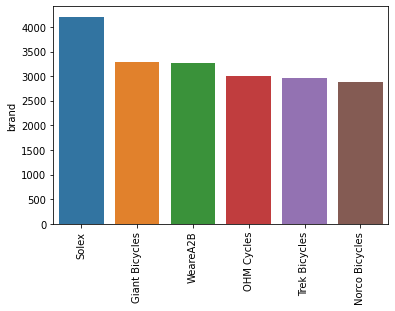

In [42]:
br = cust_trans['brand'].value_counts()

sns.barplot(x=br.index, y=br)
plt.xticks(rotation=90);

In [43]:
cust_trans[missing_cols].select_dtypes(exclude='object')

,DOB,tenure,product_first_sold_date
0,1953-10-12,11.0,38482.0
1,1953-10-12,11.0,39526.0
2,1953-10-12,11.0,37823.0
3,1953-10-12,11.0,37873.0
4,1953-10-12,11.0,38573.0
...,...,...,...
19777,1967-07-21,17.0,33879.0
19778,1967-07-21,17.0,36668.0
19779,1967-07-21,17.0,33888.0
19780,1967-07-21,17.0,34165.0


In [44]:
cust_trans.loc[cust_trans['DOB'].isnull(), missing_cols]

,job_industry_category,job_title,last_name,DOB,tenure,online_order,brand,product_line,product_class,product_size,standard_cost,product_first_sold_date
811,IT,Environmental Tech,Barrabeale,NaT,NaN,True,Giant Bicycles,Standard,medium,large,$582.48,40336.0
812,IT,Environmental Tech,Barrabeale,NaT,NaN,False,Norco Bicycles,Road,medium,large,$795.10,40553.0
813,IT,Environmental Tech,Barrabeale,NaT,NaN,True,Norco Bicycles,Standard,medium,medium,$381.10,36145.0
814,IT,Environmental Tech,Barrabeale,NaT,NaN,True,WeareA2B,Standard,medium,medium,$778.69,42145.0
815,IT,Environmental Tech,Barrabeale,NaT,NaN,True,Norco Bicycles,Standard,medium,small,$521.94,33429.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19045,IT,Engineer III,Chaffyn,NaT,NaN,True,Trek Bicycles,Road,medium,medium,$215.14,38339.0
19640,IT,Analog Circuit Design manager,Alloway,NaT,NaN,False,Giant Bicycles,Standard,high,small,"$1,759.85",41848.0
19641,IT,Analog Circuit Design manager,Alloway,NaT,NaN,False,Giant Bicycles,Standard,medium,medium,$954.82,35667.0
19642,IT,Analog Circuit Design manager,Alloway,NaT,NaN,True,Giant Bicycles,Standard,medium,small,"$1,167.18",36498.0


In [45]:
cust_trans.loc[cust_trans['tenure'].isnull(), missing_cols]

,job_industry_category,job_title,last_name,DOB,tenure,online_order,brand,product_line,product_class,product_size,standard_cost,product_first_sold_date
811,IT,Environmental Tech,Barrabeale,NaT,NaN,True,Giant Bicycles,Standard,medium,large,$582.48,40336.0
812,IT,Environmental Tech,Barrabeale,NaT,NaN,False,Norco Bicycles,Road,medium,large,$795.10,40553.0
813,IT,Environmental Tech,Barrabeale,NaT,NaN,True,Norco Bicycles,Standard,medium,medium,$381.10,36145.0
814,IT,Environmental Tech,Barrabeale,NaT,NaN,True,WeareA2B,Standard,medium,medium,$778.69,42145.0
815,IT,Environmental Tech,Barrabeale,NaT,NaN,True,Norco Bicycles,Standard,medium,small,$521.94,33429.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19045,IT,Engineer III,Chaffyn,NaT,NaN,True,Trek Bicycles,Road,medium,medium,$215.14,38339.0
19640,IT,Analog Circuit Design manager,Alloway,NaT,NaN,False,Giant Bicycles,Standard,high,small,"$1,759.85",41848.0
19641,IT,Analog Circuit Design manager,Alloway,NaT,NaN,False,Giant Bicycles,Standard,medium,medium,$954.82,35667.0
19642,IT,Analog Circuit Design manager,Alloway,NaT,NaN,True,Giant Bicycles,Standard,medium,small,"$1,167.18",36498.0


#### Removing Standard Cost null values

In [46]:
# select index of rows where standard cost is unknown
drop_index = cust_trans.loc[cust_trans['standard_cost'].isnull()].index
# drop rows where standard cost is unknown
cust_trans = cust_trans.drop(labels=drop_index, axis=0)

In [47]:
missing_perc = dsf.percentage_missing_data(cust_trans, in_percentage=True)
missing_cols = missing_perc.index
missing_perc

job_industry_category    16.18
job_title                11.93
last_name                 3.22
DOB                       2.23
tenure                    2.23
online_order              1.79
dtype: float64

In [48]:
cust_trans['online_order'].value_counts()

True     9629
False    9608
Name: online_order, dtype: int64

#### Replacing online_order null values with None

In [49]:
cust_trans['online_order'] = cust_trans['online_order'].fillna(value='None')
cust_trans['online_order'].value_counts()

True     9629
False    9608
None      351
Name: online_order, dtype: int64

In [50]:
missing = dsf.percentage_missing_data(cust_trans)
missing_cols = missing.index
missing

job_industry_category    3169
job_title                2336
last_name                 631
DOB                       436
tenure                    436
dtype: int64

#### Replace job_industry_category null values with top job_industry_category per wealth_segment

In [51]:
# job_category per wealth segment
clss = cust_trans[['wealth_segment', 'job_industry_category']].value_counts()
clss = clss.reset_index()
clss.iloc[:10]

,wealth_segment,job_industry_category,0
0,Mass Customer,Manufacturing,1989
1,Mass Customer,Financial Services,1850
2,Mass Customer,Health,1572
3,Affluent Customer,Manufacturing,1078
4,High Net Worth,Financial Services,991
5,Affluent Customer,Financial Services,965
6,High Net Worth,Manufacturing,865
7,Mass Customer,Retail,864
8,High Net Worth,Health,765
9,Affluent Customer,Health,695


In [52]:
clss.columns = clss.columns.astype(np.str_).str.replace('0', 'count')
clss

,wealth_segment,job_industry_category,count
0,Mass Customer,Manufacturing,1989
1,Mass Customer,Financial Services,1850
2,Mass Customer,Health,1572
3,Affluent Customer,Manufacturing,1078
4,High Net Worth,Financial Services,991
5,Affluent Customer,Financial Services,965
6,High Net Worth,Manufacturing,865
7,Mass Customer,Retail,864
8,High Net Worth,Health,765
9,Affluent Customer,Health,695


In [53]:
# select only the highest-occurring job_industry_category per wealth_segment
result = clss.drop_duplicates(subset=['wealth_segment'])
result

,wealth_segment,job_industry_category,count
0,Mass Customer,Manufacturing,1989
3,Affluent Customer,Manufacturing,1078
4,High Net Worth,Financial Services,991


In [54]:
na_jobindcat = cust_trans.loc[cust_trans['job_industry_category'].isnull(), ['wealth_segment', 'job_industry_category']]
na_jobindcat

,wealth_segment,job_industry_category
16,Affluent Customer,NaN
17,Affluent Customer,NaN
18,Affluent Customer,NaN
19,Affluent Customer,NaN
20,Affluent Customer,NaN
...,...,...
19617,Mass Customer,NaN
19678,Mass Customer,NaN
19679,Mass Customer,NaN
19680,Mass Customer,NaN


In [55]:
# join null job_industry_category to the result df at 'wealth_segment'
# note that the number of rows is equal to number of null values
# present in the origingal dataframe
df = pd.merge(na_jobindcat, result.drop(columns=['count']), how='left', 
              on='wealth_segment').drop(labels=['job_industry_category_x'], axis=1)
df.columns = df.columns.str.replace('_y', '')

In [56]:
# rename merged dataframe's index to match those of null values
df.index = na_jobindcat.index
df

,wealth_segment,job_industry_category
16,Affluent Customer,Manufacturing
17,Affluent Customer,Manufacturing
18,Affluent Customer,Manufacturing
19,Affluent Customer,Manufacturing
20,Affluent Customer,Manufacturing
...,...,...
19617,Mass Customer,Manufacturing
19678,Mass Customer,Manufacturing
19679,Mass Customer,Manufacturing
19680,Mass Customer,Manufacturing


In [57]:
# checking
df[df['wealth_segment'] == 'High Net Worth'].iloc[:5]

,wealth_segment,job_industry_category
336,High Net Worth,Financial Services
337,High Net Worth,Financial Services
338,High Net Worth,Financial Services
600,High Net Worth,Financial Services
601,High Net Worth,Financial Services


In [58]:
# replace job_industry_category null values with top job_industry_category per wealth_segment
cust_trans.loc[cust_trans.index.isin(df.index), 'job_industry_category'] = df['job_industry_category']

In [59]:
cust_trans.loc[(cust_trans.index.isin(df.index) ) & (cust_trans['wealth_segment'] == 'High Net Worth')].head()

,customer_id,address,postcode,state,property_valuation,transaction_id,product_id,transaction_date,online_order,brand,...,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
336,59,413 Mayer Street,2046,New South Wales,9,3052,17,2017-04-10,True,WeareA2B,...,Niki,Heathcote,Male,60,2000-02-08,Physical Therapy Assistant,Financial Services,High Net Worth,No,3.0
337,59,413 Mayer Street,2046,New South Wales,9,17695,17,2017-12-08,False,WeareA2B,...,Niki,Heathcote,Male,60,2000-02-08,Physical Therapy Assistant,Financial Services,High Net Worth,No,3.0
338,59,413 Mayer Street,2046,New South Wales,9,19676,0,2017-10-27,False,Solex,...,Niki,Heathcote,Male,60,2000-02-08,Physical Therapy Assistant,Financial Services,High Net Worth,No,3.0
600,108,0410 Division Junction,2750,New South Wales,8,4085,70,2017-11-16,False,Norco Bicycles,...,Kayle,Mingaud,Female,4,1994-03-14,NaN,Financial Services,High Net Worth,No,3.0
601,108,0410 Division Junction,2750,New South Wales,8,6300,19,2017-12-14,True,Trek Bicycles,...,Kayle,Mingaud,Female,4,1994-03-14,NaN,Financial Services,High Net Worth,No,3.0


In [60]:
dsf.percentage_missing_data(cust_trans)

job_title    2336
last_name     631
DOB           436
tenure        436
dtype: int64

##### Replace job_title null values with highest-occurring job_titles per job_industry_category

In [61]:
na_jobtitle = cust_trans.loc[cust_trans['job_title'].isnull(), ['job_industry_category', 'job_title']]
na_jobtitle.head()

,job_industry_category,job_title
14,IT,NaN
15,IT,NaN
22,Retail,NaN
23,Retail,NaN
24,Retail,NaN


In [62]:
clss = pd.DataFrame(cust_trans[['job_industry_category', 'job_title']].value_counts()).reset_index()
clss.head()

,job_industry_category,job_title,0
0,Health,Social Worker,225
1,Manufacturing,Nuclear Power Engineer,198
2,Manufacturing,Chemical Engineer,192
3,Health,Research Nurse,189
4,Health,Clinical Specialist,182


In [63]:
clss.columns = clss.columns.astype(np.str_).str.replace('0', 'count')
clss.head()

,job_industry_category,job_title,count
0,Health,Social Worker,225
1,Manufacturing,Nuclear Power Engineer,198
2,Manufacturing,Chemical Engineer,192
3,Health,Research Nurse,189
4,Health,Clinical Specialist,182


In [64]:
# retain only the highest-occurring job_title per job_industry_category
result = clss.drop_duplicates(subset=['job_industry_category'])
result

,job_industry_category,job_title,count
0,Health,Social Worker,225
1,Manufacturing,Nuclear Power Engineer,198
5,Entertainment,Assistant Media Planner,178
9,Financial Services,Senior Financial Analyst,158
11,Retail,Sales Representative,153
105,IT,Business Systems Development Analyst,37
108,Property,Internal Auditor,36
172,Telecommunications,Tax Accountant,25
197,Argiculture,Executive Secretary,23


In [65]:
df = pd.merge(na_jobtitle, result.drop(columns='count'), how='left', on='job_industry_category')
df

,job_industry_category,job_title_x,job_title_y
0,IT,NaN,Business Systems Development Analyst
1,IT,NaN,Business Systems Development Analyst
2,Retail,NaN,Sales Representative
3,Retail,NaN,Sales Representative
4,Retail,NaN,Sales Representative
...,...,...,...
2331,Entertainment,NaN,Assistant Media Planner
2332,Entertainment,NaN,Assistant Media Planner
2333,Entertainment,NaN,Assistant Media Planner
2334,Entertainment,NaN,Assistant Media Planner


In [66]:
df = df.drop(columns='job_title_x')
df.columns = df.columns.str.replace('_y', '')
df

,job_industry_category,job_title
0,IT,Business Systems Development Analyst
1,IT,Business Systems Development Analyst
2,Retail,Sales Representative
3,Retail,Sales Representative
4,Retail,Sales Representative
...,...,...
2331,Entertainment,Assistant Media Planner
2332,Entertainment,Assistant Media Planner
2333,Entertainment,Assistant Media Planner
2334,Entertainment,Assistant Media Planner


In [67]:
# rename merged dataframe's index to match those of null values
df.index = na_jobtitle.index
df

,job_industry_category,job_title
14,IT,Business Systems Development Analyst
15,IT,Business Systems Development Analyst
22,Retail,Sales Representative
23,Retail,Sales Representative
24,Retail,Sales Representative
...,...,...
19777,Entertainment,Assistant Media Planner
19778,Entertainment,Assistant Media Planner
19779,Entertainment,Assistant Media Planner
19780,Entertainment,Assistant Media Planner


In [68]:
# replace job_title null values at index
cust_trans.loc[cust_trans['job_title'].index.isin(df.index), ['job_title']] = df['job_title']
cust_trans.loc[cust_trans['job_title'].index.isin(df.index), ['job_industry_category', 'customer_id', 'job_title']]

,job_industry_category,customer_id,job_title
14,IT,4,Business Systems Development Analyst
15,IT,4,Business Systems Development Analyst
22,Retail,6,Sales Representative
23,Retail,6,Sales Representative
24,Retail,6,Sales Representative
...,...,...,...
19777,Entertainment,3500,Assistant Media Planner
19778,Entertainment,3500,Assistant Media Planner
19779,Entertainment,3500,Assistant Media Planner
19780,Entertainment,3500,Assistant Media Planner


In [69]:
cust_trans[cust_trans['job_title'].isnull()]

,customer_id,address,postcode,state,property_valuation,transaction_id,product_id,transaction_date,online_order,brand,...,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure


In [70]:
dsf.percentage_missing_data(cust_trans)

last_name    631
DOB          436
tenure       436
dtype: int64

#### Replace last_name null values with 'none'

In [71]:
na_lastname = cust_trans.loc[cust_trans['last_name'].isnull(), 'last_name']
na_lastname.index

Int64Index([   14,    15,   372,   373,   374,   375,   376,   593,   594,
              595,
            ...
            19505, 19506, 19507, 19508, 19509, 19510, 19678, 19679, 19680,
            19681],
           dtype='int64', length=631)

In [72]:
cust_trans['last_name'] = cust_trans['last_name'].fillna('None')
cust_trans.loc[cust_trans.index.isin(na_lastname.index), 'last_name']

14       None
15       None
372      None
373      None
374      None
         ... 
19510    None
19678    None
19679    None
19680    None
19681    None
Name: last_name, Length: 631, dtype: object

In [73]:
dsf.percentage_missing_data(cust_trans)

DOB       436
tenure    436
dtype: int64

#### Create an 'age' feature from DOB

In [74]:
# import datetime

In [75]:
# np.datetime64(datetime.date.today())

In [76]:
# work out an age feature from DOB
# days_diff = np.datetime64(datetime.date.today()) - cust_trans.loc[cust_trans['DOB'].notnull(), 'DOB']
# days_diff

In [77]:
cust_trans.loc[cust_trans['DOB'].notnull(), 'age'] = dsf.calc_age_from_dob(cust_trans.loc[cust_trans['DOB'].notnull(), 'DOB'])
cust_trans['age']

2021-08-12
0       24776 days
1       24776 days
2       24776 days
3       24776 days
4       24776 days
           ...    
19777   19746 days
19778   19746 days
19779   19746 days
19780   19746 days
19781   19746 days
Name: DOB, Length: 19152, dtype: timedelta64[ns]


0        67.0
1        67.0
2        67.0
3        67.0
4        67.0
         ... 
19777    54.0
19778    54.0
19779    54.0
19780    54.0
19781    54.0
Name: age, Length: 19588, dtype: float64

In [78]:
cust_trans.columns

Index(['customer_id', 'address', 'postcode', 'state', 'property_valuation',
       'transaction_id', 'product_id', 'transaction_date', 'online_order',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'trans_week_day',
       'trans_day_num', 'trans_month_num', 'trans_month', 'trans_year',
       'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age'],
      dtype='object')

In [79]:
cust_trans = cust_trans[['customer_id', 'first_name', 'last_name', 'gender', 
                         'address', 'postcode', 'state', 'DOB', 'job_title', 
                         'job_industry_category', 'wealth_segment', 'owns_car', 
                         'tenure', 'age', 'property_valuation', 'past_3_years_bike_related_purchases', 
                         'transaction_id', 'product_id', 'transaction_date', 'online_order',
                         'brand', 'product_line', 'product_class', 'product_size', 'list_price', 
                         'standard_cost', 'product_first_sold_date', 'trans_week_day', 'trans_day_num', 
                         'trans_month_num', 'trans_month', 'trans_year']]

In [80]:
dsf.percentage_missing_data(cust_trans)

DOB       436
tenure    436
age       436
dtype: int64

#### Clean up the inconsistency in the gender feature

In [81]:
cust_trans['gender'].value_counts()

Female    9791
Male      9329
U          444
F           11
Femal        7
M            6
Name: gender, dtype: int64

In [82]:
cust_trans.loc[(cust_trans['gender'] == 'Femal') | (cust_trans['gender'] == 'Female'), 'gender'] = 'F'
cust_trans.loc[(cust_trans['gender'] == 'Male'), 'gender'] = 'M'

In [83]:
print(cust_trans.shape[0])
print(cust_trans['gender'].value_counts().sum())
cust_trans['gender'].value_counts()

19588
19588


F    9809
M    9335
U     444
Name: gender, dtype: int64

#### Replace the null ages with average age per wealth_segment, job_title

In [84]:
na_ages = cust_trans.loc[cust_trans['age'].isnull(), ['wealth_segment', 'job_title', 'age']]
na_ages

,wealth_segment,job_title,age
811,Mass Customer,Environmental Tech,NaN
812,Mass Customer,Environmental Tech,NaN
813,Mass Customer,Environmental Tech,NaN
814,Mass Customer,Environmental Tech,NaN
815,Mass Customer,Environmental Tech,NaN
...,...,...,...
19045,Mass Customer,Engineer III,NaN
19640,Mass Customer,Analog Circuit Design manager,NaN
19641,Mass Customer,Analog Circuit Design manager,NaN
19642,Mass Customer,Analog Circuit Design manager,NaN


In [85]:
clss = cust_trans[['wealth_segment', 'job_title', 'age']].groupby(by=['wealth_segment', 'job_title']).mean().reset_index()
clss.head()

,wealth_segment,job_title,age
0,Affluent Customer,Account Coordinator,49.222222
1,Affluent Customer,Account Executive,37.093750
2,Affluent Customer,Account Representative I,33.222222
3,Affluent Customer,Account Representative III,28.000000
4,Affluent Customer,Account Representative IV,46.315789


In [86]:
clss['age'] = np.int32(clss['age'])
clss

,wealth_segment,job_title,age
0,Affluent Customer,Account Coordinator,49
1,Affluent Customer,Account Executive,37
2,Affluent Customer,Account Representative I,33
3,Affluent Customer,Account Representative III,28
4,Affluent Customer,Account Representative IV,46
...,...,...,...
537,Mass Customer,Web Designer III,36
538,Mass Customer,Web Designer IV,48
539,Mass Customer,Web Developer I,47
540,Mass Customer,Web Developer II,54


In [87]:
# highest-occurring age per wealth_segment, gender, job_title combo

In [88]:
result = clss.drop_duplicates(subset=['wealth_segment', 'job_title'])
result

,wealth_segment,job_title,age
0,Affluent Customer,Account Coordinator,49
1,Affluent Customer,Account Executive,37
2,Affluent Customer,Account Representative I,33
3,Affluent Customer,Account Representative III,28
4,Affluent Customer,Account Representative IV,46
...,...,...,...
537,Mass Customer,Web Designer III,36
538,Mass Customer,Web Designer IV,48
539,Mass Customer,Web Developer I,47
540,Mass Customer,Web Developer II,54


In [89]:
result.loc[ (result['wealth_segment'] == 'Affluent Customer') & (result['job_title'] == 'Office Assistant IV')]

,wealth_segment,job_title,age
101,Affluent Customer,Office Assistant IV,30


In [90]:
result.loc[ (result['wealth_segment'] == 'Affluent Customer') & (result['job_title'] == 'Staff Accountant I')]

,wealth_segment,job_title,age


In [91]:
result.loc[ (result['wealth_segment'] == 'High Net Worth') & (result['job_title'] == 'Engineer III')]

,wealth_segment,job_title,age
238,High Net Worth,Engineer III,-2147483648


In [92]:
# merge alive dataframe with result dataframe at their corresponding wealth_segment and job_title
df = pd.merge(na_ages, result, how='left', on=['wealth_segment', 'job_title'])
df

,wealth_segment,job_title,age_x,age_y
0,Mass Customer,Environmental Tech,NaN,45
1,Mass Customer,Environmental Tech,NaN,45
2,Mass Customer,Environmental Tech,NaN,45
3,Mass Customer,Environmental Tech,NaN,45
4,Mass Customer,Environmental Tech,NaN,45
...,...,...,...,...
431,Mass Customer,Engineer III,NaN,41
432,Mass Customer,Analog Circuit Design manager,NaN,44
433,Mass Customer,Analog Circuit Design manager,NaN,44
434,Mass Customer,Analog Circuit Design manager,NaN,44


In [93]:
df.shape

(436, 4)

In [94]:
# select only the rows containing the original null values
# and drop the original age column (containing null values)
df = df.drop('age_x', axis=1)
df.index = na_ages.index
df

,wealth_segment,job_title,age_y
811,Mass Customer,Environmental Tech,45
812,Mass Customer,Environmental Tech,45
813,Mass Customer,Environmental Tech,45
814,Mass Customer,Environmental Tech,45
815,Mass Customer,Environmental Tech,45
...,...,...,...
19045,Mass Customer,Engineer III,41
19640,Mass Customer,Analog Circuit Design manager,44
19641,Mass Customer,Analog Circuit Design manager,44
19642,Mass Customer,Analog Circuit Design manager,44


In [95]:
# replace the old null values at each index with a corresponding age_y
cust_trans.loc[cust_trans.index.isin(df.index), 'age'] = df['age_y']

In [96]:
cust_trans.loc[cust_trans['age'].isin(df.index), ['wealth_segment', 'job_title', 'age']]

,wealth_segment,job_title,age


#### Remove unrealistic ages (negative values)

In [97]:
dropper = cust_trans.loc[cust_trans['age'] < 18, ['wealth_segment', 'job_title', 'age', 'tenure']]
print(len(dropper))
dropper

17


,wealth_segment,job_title,age,tenure
7688,High Net Worth,Office Assistant IV,-2.147484e+09,NaN
7689,High Net Worth,Office Assistant IV,-2.147484e+09,NaN
7690,High Net Worth,Office Assistant IV,-2.147484e+09,NaN
7691,High Net Worth,Office Assistant IV,-2.147484e+09,NaN
7692,High Net Worth,Office Assistant IV,-2.147484e+09,NaN
7693,High Net Worth,Office Assistant IV,-2.147484e+09,NaN
10928,Affluent Customer,Staff Accountant II,-2.147484e+09,NaN
10929,Affluent Customer,Staff Accountant II,-2.147484e+09,NaN
10930,Affluent Customer,Staff Accountant II,-2.147484e+09,NaN
10931,Affluent Customer,Staff Accountant II,-2.147484e+09,NaN


In [98]:
cust_trans = cust_trans.drop(labels=dropper.index, axis=0)

In [99]:
dsf.percentage_missing_data(cust_trans)

DOB       419
tenure    419
dtype: int64

#### Remove DOB column since we now have an age feature

In [100]:
# cust_trans = cust_trans.drop(labels='DOB', axis=1)

####  Replace tenure null values with highest-occurring tenure values per age and job_title

In [101]:
cust_trans.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'address',
       'postcode', 'state', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'property_valuation',
       'past_3_years_bike_related_purchases', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'trans_week_day', 'trans_day_num',
       'trans_month_num', 'trans_month', 'trans_year'],
      dtype='object')

In [102]:
# null tenure values
na_tenure = cust_trans.loc[cust_trans['tenure'].isna(), ['job_title', 'age', 'tenure']]
na_tenure

,job_title,age,tenure
811,Environmental Tech,45.0,NaN
812,Environmental Tech,45.0,NaN
813,Environmental Tech,45.0,NaN
814,Environmental Tech,45.0,NaN
815,Environmental Tech,45.0,NaN
...,...,...,...
19045,Engineer III,41.0,NaN
19640,Analog Circuit Design manager,44.0,NaN
19641,Analog Circuit Design manager,44.0,NaN
19642,Analog Circuit Design manager,44.0,NaN


In [103]:
# highest-occurring tenures per job_title, age
clss = cust_trans.loc[cust_trans['tenure'].notnull(), ['job_title', 'age', 'tenure']].value_counts().reset_index()
clss.columns = clss.columns.astype(np.str_).str.replace('0', 'count')
clss

,job_title,age,tenure,count
0,Senior Financial Analyst,43.0,17.0,26
1,Nuclear Power Engineer,41.0,4.0,22
2,Sales Representative,22.0,1.0,20
3,Nuclear Power Engineer,43.0,17.0,18
4,Accountant IV,43.0,16.0,18
...,...,...,...,...
3302,Professor,40.0,20.0,1
3303,Technical Writer,33.0,22.0,1
3304,Chemical Engineer,47.0,16.0,1
3305,Assistant Manager,34.0,17.0,1


In [104]:
# checking for presence of ['job_title', 'age'] combination duplicates
clss.loc[ (clss['job_title'] == 'Senior Financial Analyst') & (clss['age'] == 43) ]

,job_title,age,tenure,count
0,Senior Financial Analyst,43.0,17.0,26
395,Senior Financial Analyst,43.0,13.0,9
1214,Senior Financial Analyst,43.0,11.0,6
1690,Senior Financial Analyst,43.0,15.0,5


In [105]:
# remove duplicated job_title, age matches
result = clss.drop_duplicates(subset=['job_title', 'age'])
result

,job_title,age,tenure,count
0,Senior Financial Analyst,43.0,17.0,26
1,Nuclear Power Engineer,41.0,4.0,22
2,Sales Representative,22.0,1.0,20
3,Nuclear Power Engineer,43.0,17.0,18
4,Accountant IV,43.0,16.0,18
...,...,...,...,...
3300,GIS Technical Architect,25.0,7.0,1
3301,Structural Analysis Engineer,20.0,1.0,1
3303,Technical Writer,33.0,22.0,1
3305,Assistant Manager,34.0,17.0,1


In [106]:
# checking for job_title-age combo duplicates
# after selecting only the first occurrences (highest-occurring) of each combo
result.loc[ (result['job_title'] == 'Senior Financial Analyst') & (clss['age'] == 43) ]

,job_title,age,tenure,count
0,Senior Financial Analyst,43.0,17.0,26


In [107]:
result.loc[result['tenure'].isnull()]

,job_title,age,tenure,count


In [108]:
df = pd.merge(na_tenure, result.drop(columns='count'), on=['job_title', 'age'], how='left')
df

,job_title,age,tenure_x,tenure_y
0,Environmental Tech,45.0,NaN,21.0
1,Environmental Tech,45.0,NaN,21.0
2,Environmental Tech,45.0,NaN,21.0
3,Environmental Tech,45.0,NaN,21.0
4,Environmental Tech,45.0,NaN,21.0
...,...,...,...,...
414,Engineer III,41.0,NaN,NaN
415,Analog Circuit Design manager,44.0,NaN,18.0
416,Analog Circuit Design manager,44.0,NaN,18.0
417,Analog Circuit Design manager,44.0,NaN,18.0


In [109]:
df.loc[ (df['job_title'] == 'Engineer III') & (df['age'] == 41)]

,job_title,age,tenure_x,tenure_y
409,Engineer III,41.0,NaN,NaN
410,Engineer III,41.0,NaN,NaN
411,Engineer III,41.0,NaN,NaN
412,Engineer III,41.0,NaN,NaN
413,Engineer III,41.0,NaN,NaN
414,Engineer III,41.0,NaN,NaN


In [110]:
cust_trans.loc[ (cust_trans['job_title'] == 'Engineer III') & (cust_trans['age'] == 41), ['job_title', 'age', 'tenure']]

,job_title,age,tenure
19040,Engineer III,41.0,NaN
19041,Engineer III,41.0,NaN
19042,Engineer III,41.0,NaN
19043,Engineer III,41.0,NaN
19044,Engineer III,41.0,NaN
19045,Engineer III,41.0,NaN


In [111]:
df = df.drop(labels='tenure_x', axis=1)
df.index = na_tenure.index
df

,job_title,age,tenure_y
811,Environmental Tech,45.0,21.0
812,Environmental Tech,45.0,21.0
813,Environmental Tech,45.0,21.0
814,Environmental Tech,45.0,21.0
815,Environmental Tech,45.0,21.0
...,...,...,...
19045,Engineer III,41.0,NaN
19640,Analog Circuit Design manager,44.0,18.0
19641,Analog Circuit Design manager,44.0,18.0
19642,Analog Circuit Design manager,44.0,18.0


In [112]:
# check for lingering null values in tenure
lingering_null = df[df['tenure_y'].isnull()]
lingering_null

,job_title,age,tenure_y
931,General Manager,39.0,NaN
932,General Manager,39.0,NaN
933,General Manager,39.0,NaN
934,General Manager,39.0,NaN
935,General Manager,39.0,NaN
...,...,...,...
19041,Engineer III,41.0,NaN
19042,Engineer III,41.0,NaN
19043,Engineer III,41.0,NaN
19044,Engineer III,41.0,NaN


In [113]:
# replace values, at null tenure index, with matching tenure_y
cust_trans.loc[cust_trans['tenure'].index.isin(df.index), 'tenure'] = df['tenure_y']
cust_trans.loc[cust_trans['tenure'].index.isin(df.index)]

,customer_id,first_name,last_name,gender,address,postcode,state,DOB,job_title,job_industry_category,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year
811,144,Jory,Barrabeale,U,22 Oxford Junction,2315,New South Wales,NaT,Environmental Tech,IT,...,medium,large,1812.75,$582.48,40336.0,Sunday,18,6,June,2017
812,144,Jory,Barrabeale,U,22 Oxford Junction,2315,New South Wales,NaT,Environmental Tech,IT,...,medium,large,1240.31,$795.10,40553.0,Wednesday,29,11,November,2017
813,144,Jory,Barrabeale,U,22 Oxford Junction,2315,New South Wales,NaT,Environmental Tech,IT,...,medium,medium,1198.46,$381.10,36145.0,Thursday,2,11,November,2017
814,144,Jory,Barrabeale,U,22 Oxford Junction,2315,New South Wales,NaT,Environmental Tech,IT,...,medium,medium,1807.45,$778.69,42145.0,Saturday,18,3,March,2017
815,144,Jory,Barrabeale,U,22 Oxford Junction,2315,New South Wales,NaT,Environmental Tech,IT,...,medium,small,586.45,$521.94,33429.0,Sunday,26,2,February,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19045,3365,Karlens,Chaffyn,U,297 Kinsman Park,2766,NSW,NaT,Engineer III,IT,...,medium,medium,290.62,$215.14,38339.0,Monday,17,7,July,2017
19640,3473,Sanderson,Alloway,U,7279 Steensland Circle,3803,VIC,NaT,Analog Circuit Design manager,IT,...,high,small,1977.36,"$1,759.85",41848.0,Monday,18,12,December,2017
19641,3473,Sanderson,Alloway,U,7279 Steensland Circle,3803,VIC,NaT,Analog Circuit Design manager,IT,...,medium,medium,1403.50,$954.82,35667.0,Friday,4,8,August,2017
19642,3473,Sanderson,Alloway,U,7279 Steensland Circle,3803,VIC,NaT,Analog Circuit Design manager,IT,...,medium,small,1311.44,"$1,167.18",36498.0,Saturday,7,10,October,2017


In [114]:
dsf.percentage_missing_data(cust_trans, True)

DOB       2.14
tenure    0.85
dtype: float64

In [115]:
# remove the 0.85% of null tenures still lingering
cust_trans = cust_trans.drop(labels=lingering_null.index, axis=0)

In [116]:
cust_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19405 entries, 0 to 19781
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19405 non-null  int64         
 1   first_name                           19405 non-null  object        
 2   last_name                            19405 non-null  object        
 3   gender                               19405 non-null  object        
 4   address                              19405 non-null  object        
 5   postcode                             19405 non-null  int64         
 6   state                                19405 non-null  object        
 7   DOB                                  19152 non-null  datetime64[ns]
 8   job_title                            19405 non-null  object        
 9   job_industry_category                19405 non-null  object        
 10  wealth_seg

In [117]:
cust_trans.head()

,customer_id,first_name,last_name,gender,address,postcode,state,DOB,job_title,job_industry_category,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year
0,1,Laraine,Medendorp,F,060 Morning Avenue,2016,New South Wales,1953-10-12,Executive Secretary,Health,...,medium,medium,235.63,$125.07,38482.0,Saturday,23,12,December,2017
1,1,Laraine,Medendorp,F,060 Morning Avenue,2016,New South Wales,1953-10-12,Executive Secretary,Health,...,medium,medium,1577.53,$826.51,39526.0,Thursday,6,4,April,2017
2,1,Laraine,Medendorp,F,060 Morning Avenue,2016,New South Wales,1953-10-12,Executive Secretary,Health,...,low,small,1720.70,"$1,531.42",37823.0,Thursday,11,5,May,2017
3,1,Laraine,Medendorp,F,060 Morning Avenue,2016,New South Wales,1953-10-12,Executive Secretary,Health,...,medium,medium,360.40,$270.30,37873.0,Thursday,5,1,January,2017
4,1,Laraine,Medendorp,F,060 Morning Avenue,2016,New South Wales,1953-10-12,Executive Secretary,Health,...,medium,medium,71.49,$53.62,38573.0,Tuesday,21,2,February,2017


In [118]:
# na_dob = cust_trans.loc[cust_trans['DOB'].isna()]
# na_dob.index

In [119]:
dsf.percentage_missing_data(cust_trans)

DOB    253
dtype: int64

#### Save cleaned data to csv

In [120]:
print(sf['KPMG_VI_Transactions.csv'])
fpath = "{o}\\{f}".format(o='\\'.join(sf['KPMG_VI_Transactions.csv'].split('\\')[:-1]), f="\\cleaned-KPMG-cust-trans.csv")
print(fpath)

W:\Analyst & Business Skillset\Data analysis\Datasets\KPMG Raw Datasets\KPMG_VI_Transactions.csv
W:\Analyst & Business Skillset\Data analysis\Datasets\KPMG Raw Datasets\\cleaned-KPMG-cust-trans.csv


In [121]:
cust_trans.to_csv(fpath, index_label=False)

In [122]:
with open(fpath, 'r', encoding='utf8') as f:
    print(*[f'{l}\n' for n, l in enumerate(f.readlines()) if n < 5])

customer_id,first_name,last_name,gender,address,postcode,state,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,property_valuation,past_3_years_bike_related_purchases,transaction_id,product_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year

 0,1,Laraine,Medendorp,F,060 Morning Avenue,2016,New South Wales,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0,10,93,94,86,2017-12-23,False,OHM Cycles,Standard,medium,medium,235.63,$125.07,38482.0,Saturday,23,12,December,2017

 1,1,Laraine,Medendorp,F,060 Morning Avenue,2016,New South Wales,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0,10,93,3765,38,2017-04-06,True,Solex,Standard,medium,medium,1577.53,$826.51,39526.0,Thursday,6,4,April,2017

 2,1,Laraine,Medendorp,F,060 Morning Avenue,2016,New South Wales,1953-10-12,Executive Secretary,Health,Ma

In [123]:
stop here

SyntaxError: invalid syntax (<ipython-input-123-a96ba3aab008>, line 1)

In [124]:
import shutil

In [125]:
pth

'W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets'

In [126]:
pth = "C:\\Users\\welcome\\Documents\\Data science"
sf = mf.file_search(pth, 'KPMG', 'ipynb')
sf.keys()

dict_keys(['KPMG.ipynb', 'KPMG-checkpoint.ipynb', 'KPMG-Data-Cleaning.ipynb', 'KPMG-ML-model.ipynb', 'KPMG-visualization-analysis.ipynb', 'KPMG-Data-Cleaning-checkpoint.ipynb', 'KPMG-ML-model-checkpoint.ipynb', 'KPMG-visualization-analysis-checkpoint.ipynb'])

In [131]:
dest = "W:\Analyst & Business Skillset\Data analysis\Datasets\KPMG Raw Datasets\\"
shutil.copy(src=sf['KPMG-Data-Cleaning.ipynb'], dst=dest)

KeyError: 'KPMG-Data-Cleaning.ipynb'

In [128]:
# pth = 'C:\\Users\\welcome\\Documents\\Data science'
pth = "W:\Analyst & Business Skillset\Data analysis\Datasets\KPMG Raw Datasets\\"
sf = mf.file_search(pth, 'cleaned-KPMG', 'csv')
sf.keys()

dict_keys(['cleaned-KPMG-cust-trans.csv'])

In [129]:
df = pd.read_csv(*sf.values())
print(df.columns)
df.head()

Index(['customer_id', 'first_name', 'last_name', 'gender', 'address',
       'postcode', 'state', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'property_valuation',
       'past_3_years_bike_related_purchases', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'trans_week_day', 'trans_day_num',
       'trans_month_num', 'trans_month', 'trans_year'],
      dtype='object')


,customer_id,first_name,last_name,gender,address,postcode,state,DOB,job_title,job_industry_category,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year
0,1,Laraine,Medendorp,F,060 Morning Avenue,2016,New South Wales,1953-10-12,Executive Secretary,Health,...,medium,medium,235.63,$125.07,38482.0,Saturday,23,12,December,2017
1,1,Laraine,Medendorp,F,060 Morning Avenue,2016,New South Wales,1953-10-12,Executive Secretary,Health,...,medium,medium,1577.53,$826.51,39526.0,Thursday,6,4,April,2017
2,1,Laraine,Medendorp,F,060 Morning Avenue,2016,New South Wales,1953-10-12,Executive Secretary,Health,...,low,small,1720.70,"$1,531.42",37823.0,Thursday,11,5,May,2017
3,1,Laraine,Medendorp,F,060 Morning Avenue,2016,New South Wales,1953-10-12,Executive Secretary,Health,...,medium,medium,360.40,$270.30,37873.0,Thursday,5,1,January,2017
4,1,Laraine,Medendorp,F,060 Morning Avenue,2016,New South Wales,1953-10-12,Executive Secretary,Health,...,medium,medium,71.49,$53.62,38573.0,Tuesday,21,2,February,2017


In [130]:
print([var for var in globals() if not var.startswith("_")])

['In', 'Out', 'get_ipython', 'exit', 'quit', 'joblib', 'np', 'pd', 'plt', 'sns', 'my_package', 'imp_mods', 'mf', 'pth', 'sf', 'trans', 'days_count', 'custs', 'trans2', 'dsf', 'missing', 'mp', 'fig', 'l', 'r', 'ords', 'approved_trans', 'cust_trans', 'missing_data', 'missing_cols', 'cust_ids', 'cust_addr', 'na_stdcost', 'br', 'drop_index', 'missing_perc', 'clss', 'result', 'na_jobindcat', 'df', 'na_jobtitle', 'na_lastname', 'na_ages', 'dropper', 'na_tenure', 'lingering_null', 'fpath', 'f', 'shutil', 'dest']


<b> --- The End --- </b>